# HateXplain Dataset - Exploratory Data Analysis

## Overview
This notebook provides a comprehensive exploratory data analysis (EDA) of the HateXplain dataset for hate speech detection. The analysis is performed on the complete dataset (train, validation, and test splits) to understand label distributions, target group patterns, text characteristics, and annotation quality.

## Dataset Information
- **Source**: HateXplain dataset for hate speech detection
- **Data Location**: `data/processed/hatexplain/` (train, val, test splits)
- **Labels**: 3 categories (Normal, Hatespeech, Offensive)
- **Target Groups**: Multiple demographic groups (ethnicity, religion, gender, etc.)
- **Annotations**: 3 annotators per post with agreement scores
- **Features**: Text content, token counts, rationales, and quality metrics

## Key Analysis Goals
✓ **Label Distribution**: Understand class balance and imbalance patterns  
✓ **Target Group Analysis**: Identify most/least targeted demographics  
✓ **Text Characteristics**: Analyze length distributions and content patterns  
✓ **Annotation Quality**: Assess inter-annotator agreement and data reliability  
✓ **Data Completeness**: Evaluate rationale coverage and missing data  
✓ **ML Readiness**: Provide recommendations for model training

## Analysis Sections
1. **Dataset Structure & Statistics Overview**
2. **Label Distribution Analysis** 
3. **Persona/Target Group Analysis**
4. **Text Length & Token Analysis**
5. **Data Quality Assessment**
6. **Comprehensive Summary & Insights**

## 1. Import Required Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.1.3
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


## 2. Load Dataset Statistics

In [2]:
# Load the HateXplain dataset statistics and actual data
stats_path = Path("../data/processed/hatexplain/dataset_stats.json")

# Load statistics from JSON file (for determining what plots to create)
with open(stats_path, 'r') as f:
    hatexplain_stats = json.load(f)

# Load actual dataset files
train_path = Path("../data/processed/hatexplain/hatexplain_train.json")
val_path = Path("../data/processed/hatexplain/hatexplain_val.json") 
test_path = Path("../data/processed/hatexplain/hatexplain_test.json")

print("=== Loading HateXplain Dataset ===")
print("Loading training data...")
with open(train_path, 'r') as f:
    train_data = json.load(f)

print("Loading validation data...")
with open(val_path, 'r') as f:
    val_data = json.load(f)
    
print("Loading test data...")
with open(test_path, 'r') as f:
    test_data = json.load(f)

# Combine all data
all_data = train_data + val_data + test_data
print(f"Total entries loaded: {len(all_data):,}")

# Extract key statistics from actual data
actual_total_entries = len(all_data)
actual_labels = [item['majority_label'] for item in all_data]
actual_personas = [item['target'] for item in all_data]
actual_token_counts = [item['token_count'] for item in all_data]
actual_rationales = [item['has_rationales'] for item in all_data]
actual_agreements = [item['label_agreement'] for item in all_data]

print(f"\n=== HateXplain Dataset Statistics from Actual Data ===")
print(f"Total Entries: {actual_total_entries:,}")
print(f"Average Tokens per Post: {np.mean(actual_token_counts):.2f}")
print(f"Min Tokens: {min(actual_token_counts)}")
print(f"Max Tokens: {max(actual_token_counts)}")
print(f"Missing Rationales: {sum(1 for x in actual_rationales if not x):,}")
print(f"Annotation Agreement: {np.mean(actual_agreements):.4f}")

=== Loading HateXplain Dataset ===
Loading training data...
Loading validation data...
Loading test data...
Total entries loaded: 19,229

=== HateXplain Dataset Statistics from Actual Data ===
Total Entries: 19,229
Average Tokens per Post: 23.43
Min Tokens: 2
Max Tokens: 165
Missing Rationales: 7,814
Annotation Agreement: 0.8373


## 3. Label Distribution Analysis

=== Label Distribution (from Actual Data) ===
     Label  Count  Percentage
    normal   7814   40.636539
hatespeech   5935   30.864840
 offensive   5480   28.498622

Total Labels: 19,229


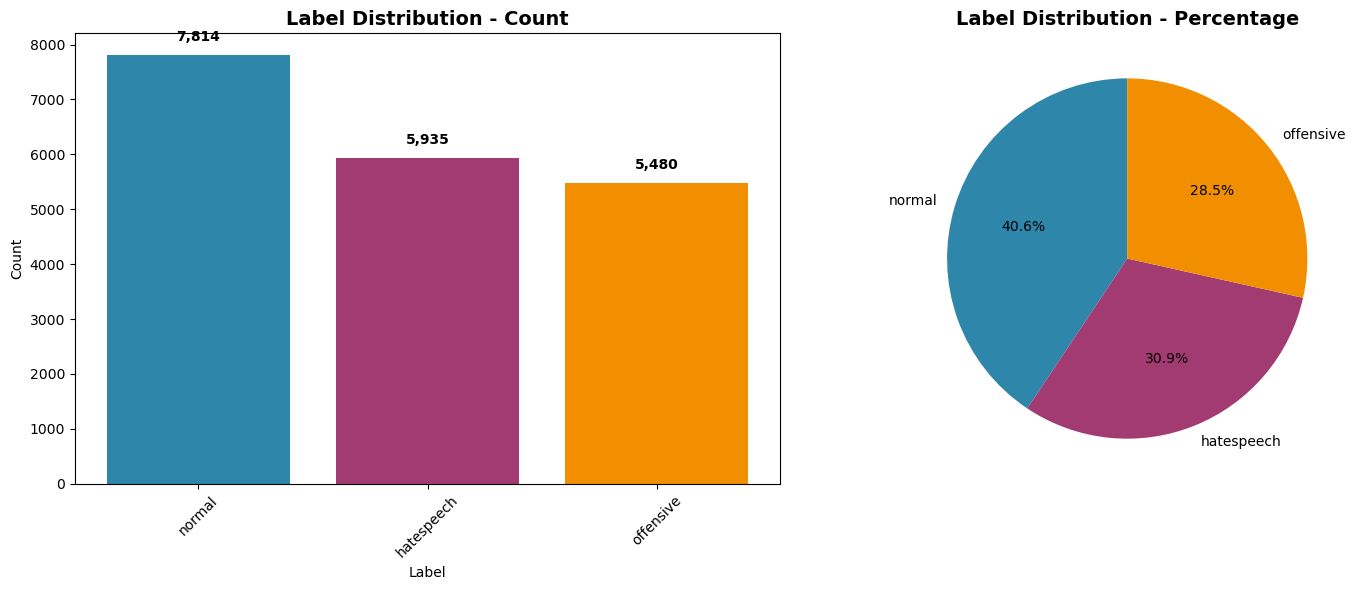


=== Class Imbalance Analysis ===
Max class size: 7,814
Min class size: 5,480
Imbalance ratio: 1.43:1


In [3]:
# Extract and analyze label distribution from actual data
from collections import Counter

labels = Counter(actual_labels)
total_labels = sum(labels.values())

# Calculate percentages
label_percentages = {label: (count/total_labels)*100 for label, count in labels.items()}

# Create DataFrame for easier analysis
label_df = pd.DataFrame([
    {'Label': label, 'Count': count, 'Percentage': label_percentages[label]} 
    for label, count in labels.items()
])

print("=== Label Distribution (from Actual Data) ===")
print(label_df.to_string(index=False))
print(f"\nTotal Labels: {total_labels:,}")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
colors = ['#2E86AB', '#A23B72', '#F18F01']
bars = ax1.bar(label_df['Label'], label_df['Count'], color=colors)
ax1.set_title('Label Distribution - Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, count in zip(bars, label_df['Count']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2.pie(label_df['Count'], labels=label_df['Label'], autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Label Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate class imbalance metrics
print("\n=== Class Imbalance Analysis ===")
max_class = max(labels.values())
min_class = min(labels.values())
imbalance_ratio = max_class / min_class
print(f"Max class size: {max_class:,}")
print(f"Min class size: {min_class:,}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

## 4. Persona/Target Group Analysis

=== Top 15 Personas by Frequency (from Actual Data) ===
   Persona  Count  Percentage
      None   3891   20.235062
   African   3318   17.255187
     Islam   1984   10.317749
Homosexual   1840    9.568880
     Other   1669    8.679599
    Jewish   1624    8.445577
     Women   1498    7.790317
   Refugee    878    4.566020
 Caucasian    680    3.536325
      Arab    607    3.156690
     Asian    391    2.033387
       Men    355    1.846170
  Hispanic    279    1.450933
Disability     72    0.374434
 Christian     50    0.260024

=== Persona Summary ===
Posts without specific target: 3,891 (20.2%)
Posts with specific targets: 15,338 (79.8%)
Number of distinct target groups: 21


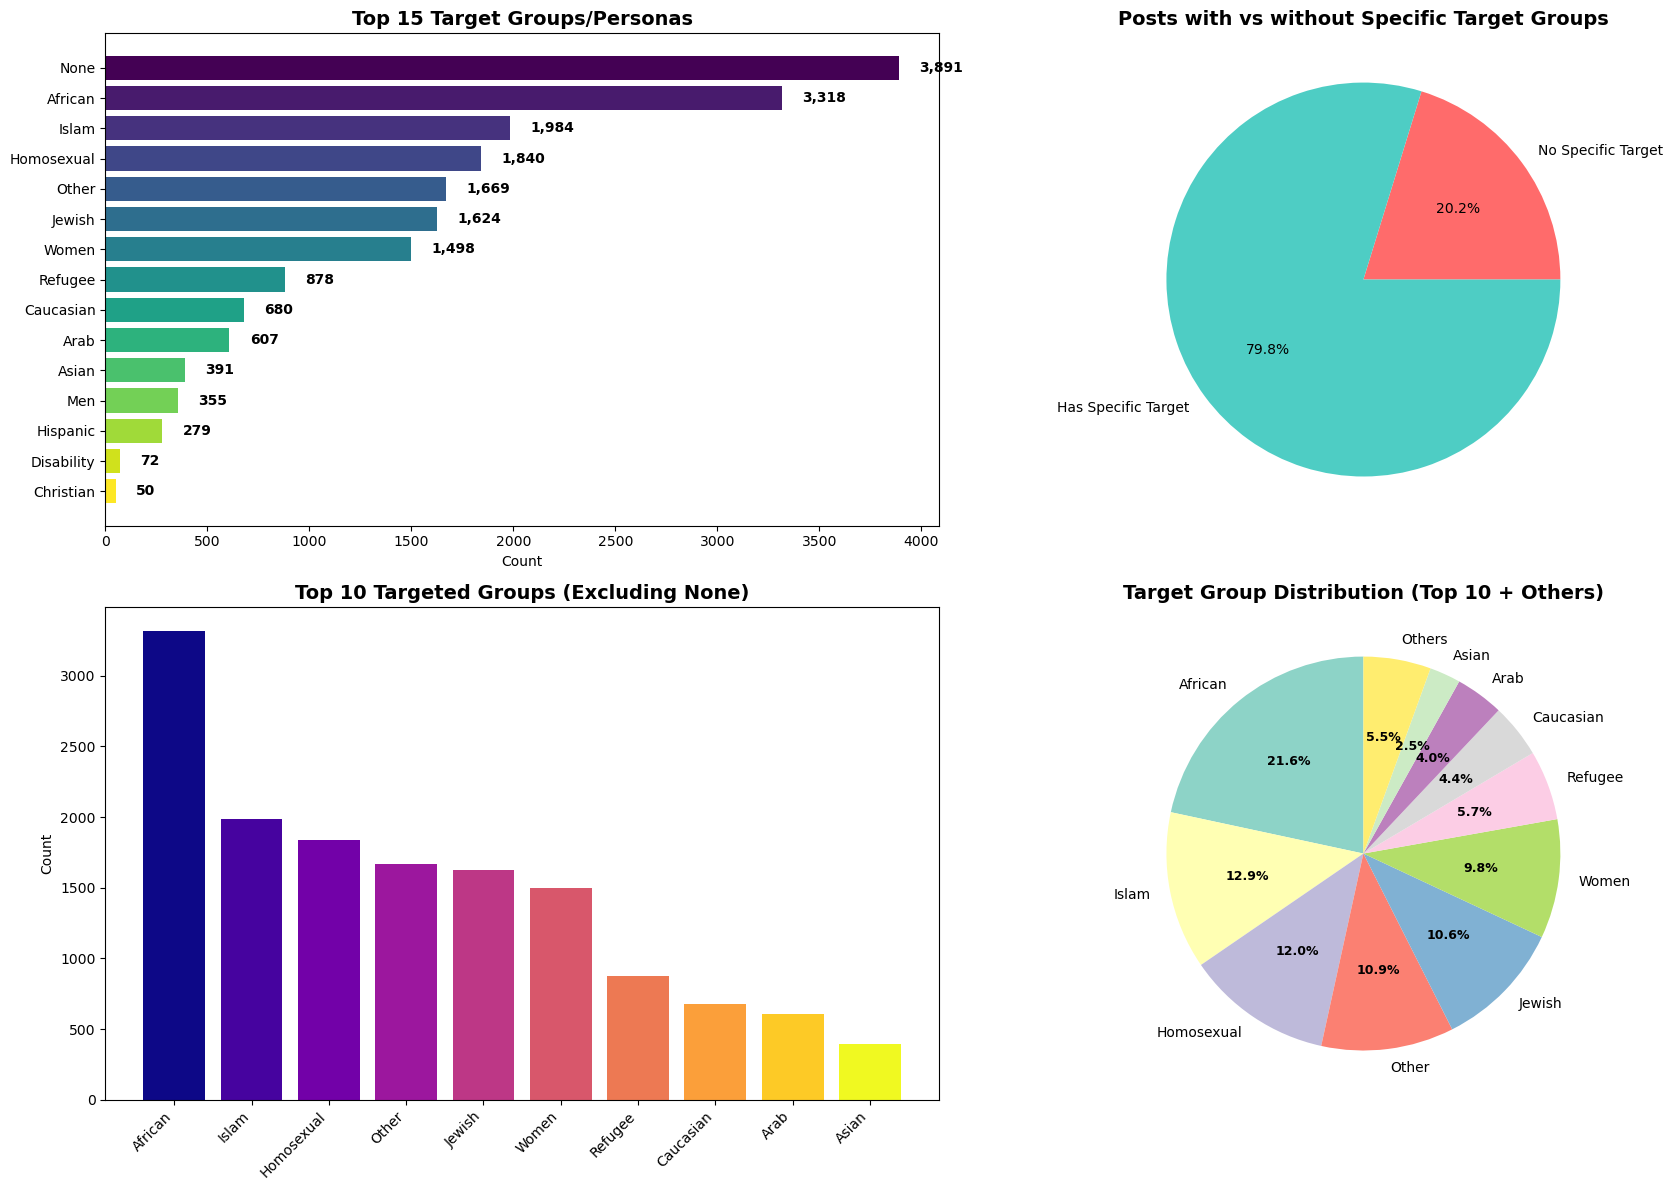

In [8]:
# Extract and analyze persona distribution from actual data
personas = Counter(actual_personas)
total_personas = sum(personas.values())

# Create DataFrame and sort by count
persona_df = pd.DataFrame([
    {'Persona': persona, 'Count': count, 'Percentage': (count/total_personas)*100} 
    for persona, count in personas.items()
]).sort_values('Count', ascending=False)

print("=== Top 15 Personas by Frequency (from Actual Data) ===")
print(persona_df.head(15).to_string(index=False))

# Separate None vs actual target groups
none_count = personas.get('None', 0)
targeted_personas = {k: v for k, v in personas.items() if k != 'None'}
targeted_total = sum(targeted_personas.values())

print(f"\n=== Persona Summary ===")
print(f"Posts without specific target: {none_count:,} ({(none_count/total_personas)*100:.1f}%)")
print(f"Posts with specific targets: {targeted_total:,} ({(targeted_total/total_personas)*100:.1f}%)")
print(f"Number of distinct target groups: {len(targeted_personas)}")

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Top 15 personas bar chart
top_15 = persona_df.head(15)
bars = ax1.barh(range(len(top_15)), top_15['Count'], color=plt.cm.viridis(np.linspace(0, 1, len(top_15))))
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['Persona'])
ax1.set_xlabel('Count')
ax1.set_title('Top 15 Target Groups/Personas', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Add count labels
for i, (bar, count) in enumerate(zip(bars, top_15['Count'])):
    ax1.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{count:,}', va='center', fontweight='bold')

# None vs Targeted pie chart
ax2.pie([none_count, targeted_total], 
        labels=['No Specific Target', 'Has Specific Target'], 
        autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'])
ax2.set_title('Posts with vs without Specific Target Groups', fontsize=14, fontweight='bold')

# Top 10 targeted groups
targeted_df = persona_df[persona_df['Persona'] != 'None'].copy()
top_10_targeted = targeted_df.head(10)
ax3.bar(range(len(top_10_targeted)), top_10_targeted['Count'], 
        color=plt.cm.plasma(np.linspace(0, 1, len(top_10_targeted))))
ax3.set_xticks(range(len(top_10_targeted)))
ax3.set_xticklabels(top_10_targeted['Persona'], rotation=45, ha='right')
ax3.set_ylabel('Count')
ax3.set_title('Top 10 Targeted Groups (Excluding None)', fontsize=14, fontweight='bold')

# Target group pie chart showing percentage distribution
top_10_for_pie = targeted_df.head(10)
other_count = targeted_df.iloc[10:]['Count'].sum() if len(targeted_df) > 10 else 0

# Prepare data for pie chart
pie_labels = list(top_10_for_pie['Persona'])
pie_values = list(top_10_for_pie['Count'])

if other_count > 0:
    pie_labels.append('Others')
    pie_values.append(other_count)

# Create pie chart with custom colors
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(pie_values)))
wedges, texts, autotexts = ax4.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', 
                                    colors=colors_pie, startangle=90)

# Make percentage text bold and readable
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

ax4.set_title('Target Group Distribution (Top 10 + Others)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 5. Text Length and Token Analysis

=== Token Length Statistics (from Actual Data) ===
Average tokens per post: 23.43
Minimum tokens: 2
Maximum tokens: 165
Token range: 163 tokens
Median tokens: 20.00
Standard deviation: 13.79


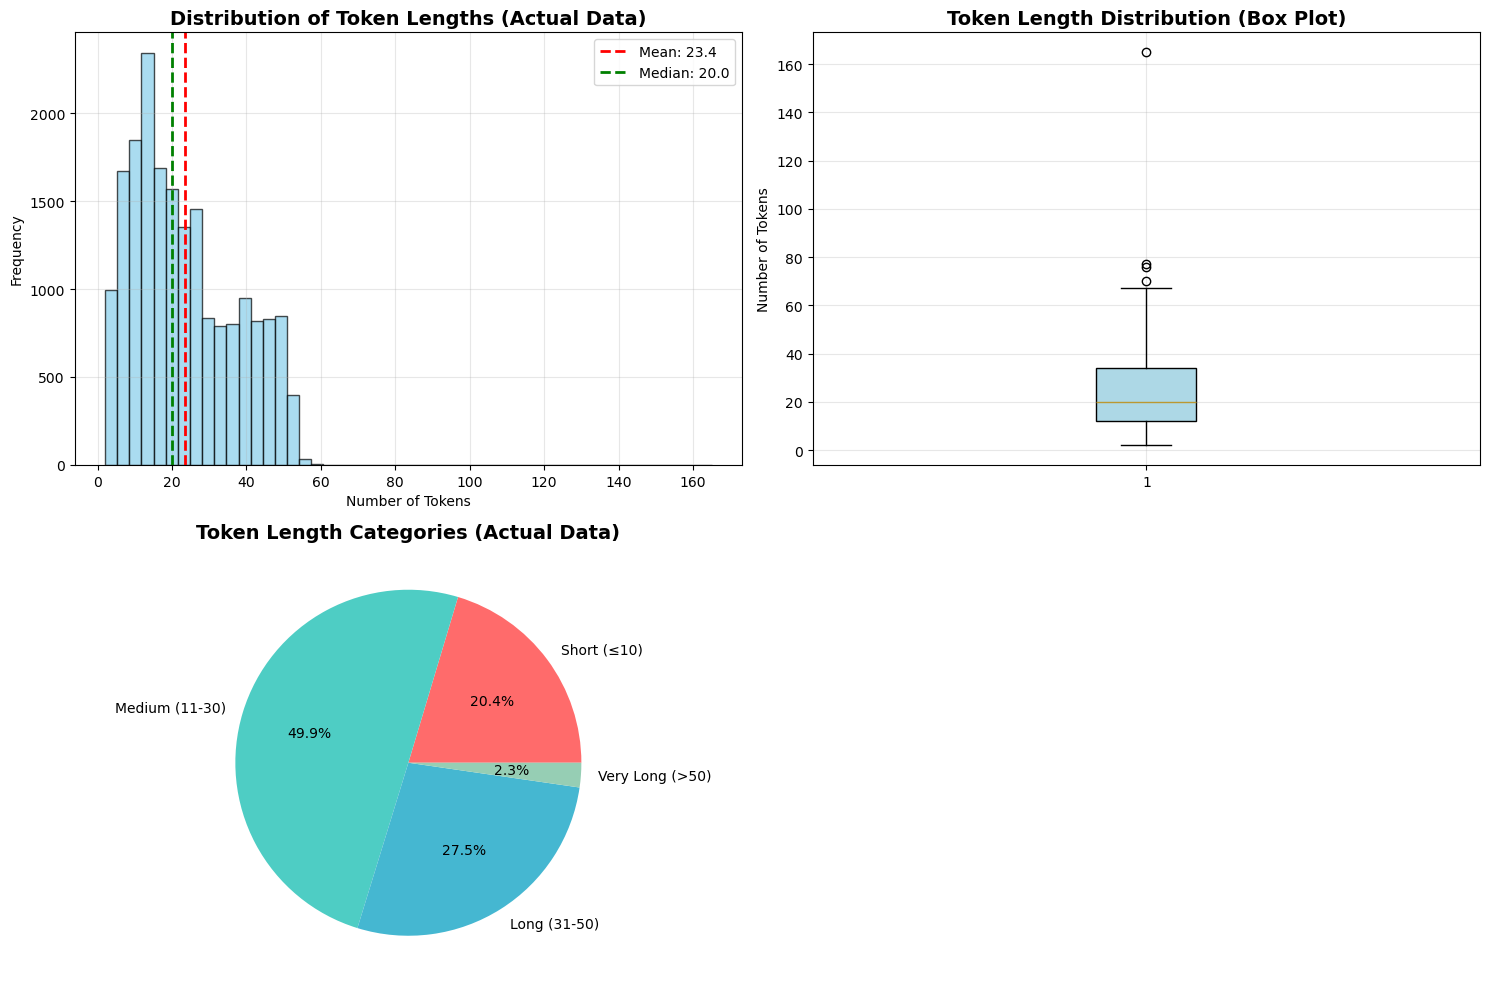


=== Actual Distribution Statistics ===
Mean: 23.43 tokens
Median: 20.00 tokens
Standard Deviation: 13.79 tokens
25th Percentile: 12.00 tokens
75th Percentile: 34.00 tokens

=== Token Length Categories ===
Short (≤10): 3,916 posts (20.4%)
Medium (11-30): 9,591 posts (49.9%)
Long (31-50): 5,282 posts (27.5%)
Very Long (>50): 440 posts (2.3%)

=== Additional Insights ===
Mode (most common length): 9 tokens
95th Percentile: 49.00 tokens
99th Percentile: 52.00 tokens
Texts with exactly 1 token: 0
Texts over 100 tokens: 1 (0.0%)


In [5]:
# Extract text length statistics from actual data
actual_lengths = np.array(actual_token_counts)
avg_tokens = np.mean(actual_lengths)
min_tokens = np.min(actual_lengths)
max_tokens = np.max(actual_lengths)

print("=== Token Length Statistics (from Actual Data) ===")
print(f"Average tokens per post: {avg_tokens:.2f}")
print(f"Minimum tokens: {min_tokens}")
print(f"Maximum tokens: {max_tokens}")
print(f"Token range: {max_tokens - min_tokens} tokens")
print(f"Median tokens: {np.median(actual_lengths):.2f}")
print(f"Standard deviation: {np.std(actual_lengths):.2f}")

# Create visualizations using actual token distributions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of actual token lengths
ax1.hist(actual_lengths, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
ax1.axvline(avg_tokens, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_tokens:.1f}')
ax1.axvline(np.median(actual_lengths), color='green', linestyle='--', linewidth=2, 
           label=f'Median: {np.median(actual_lengths):.1f}')
ax1.set_xlabel('Number of Tokens')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Token Lengths (Actual Data)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(actual_lengths, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue'))
ax2.set_ylabel('Number of Tokens')
ax2.set_title('Token Length Distribution (Box Plot)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Text length categories based on actual data
short_texts = np.sum(actual_lengths <= 10)
medium_texts = np.sum((actual_lengths > 10) & (actual_lengths <= 30))
long_texts = np.sum((actual_lengths > 30) & (actual_lengths <= 50))
very_long_texts = np.sum(actual_lengths > 50)

categories = ['Short (≤10)', 'Medium (11-30)', 'Long (31-50)', 'Very Long (>50)']
counts = [short_texts, medium_texts, long_texts, very_long_texts]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

ax3.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors)
ax3.set_title('Token Length Categories (Actual Data)', fontsize=14, fontweight='bold')

# Remove the fourth subplot (ax4) to clean up layout
ax4.remove()

plt.tight_layout()
plt.show()

# Statistical summary from actual data
print(f"\n=== Actual Distribution Statistics ===")
print(f"Mean: {np.mean(actual_lengths):.2f} tokens")
print(f"Median: {np.median(actual_lengths):.2f} tokens")
print(f"Standard Deviation: {np.std(actual_lengths):.2f} tokens")
print(f"25th Percentile: {np.percentile(actual_lengths, 25):.2f} tokens")
print(f"75th Percentile: {np.percentile(actual_lengths, 75):.2f} tokens")

print(f"\n=== Token Length Categories ===")
n_samples = len(actual_lengths)
for category, count in zip(categories, counts):
    percentage = (count / n_samples) * 100
    print(f"{category}: {count:,} posts ({percentage:.1f}%)")

# Additional insights from actual data
print(f"\n=== Additional Insights ===")
print(f"Mode (most common length): {np.bincount(actual_lengths).argmax()} tokens")
print(f"95th Percentile: {np.percentile(actual_lengths, 95):.2f} tokens")
print(f"99th Percentile: {np.percentile(actual_lengths, 99):.2f} tokens")
print(f"Texts with exactly 1 token: {np.sum(actual_lengths == 1):,}")
print(f"Texts over 100 tokens: {np.sum(actual_lengths > 100):,} ({(np.sum(actual_lengths > 100)/n_samples)*100:.1f}%)")


## 6. Data Quality Assessment

=== Data Quality Assessment (from Actual Data) ===
Total dataset entries: 19,229
Missing rationales: 7,814
Rationale coverage: 59.4%
Annotation agreement score: 0.8373

=== Quality Assessment Interpretation ===
Annotation Agreement: Excellent (≥0.8)
Rationale Coverage: Poor (<60%)


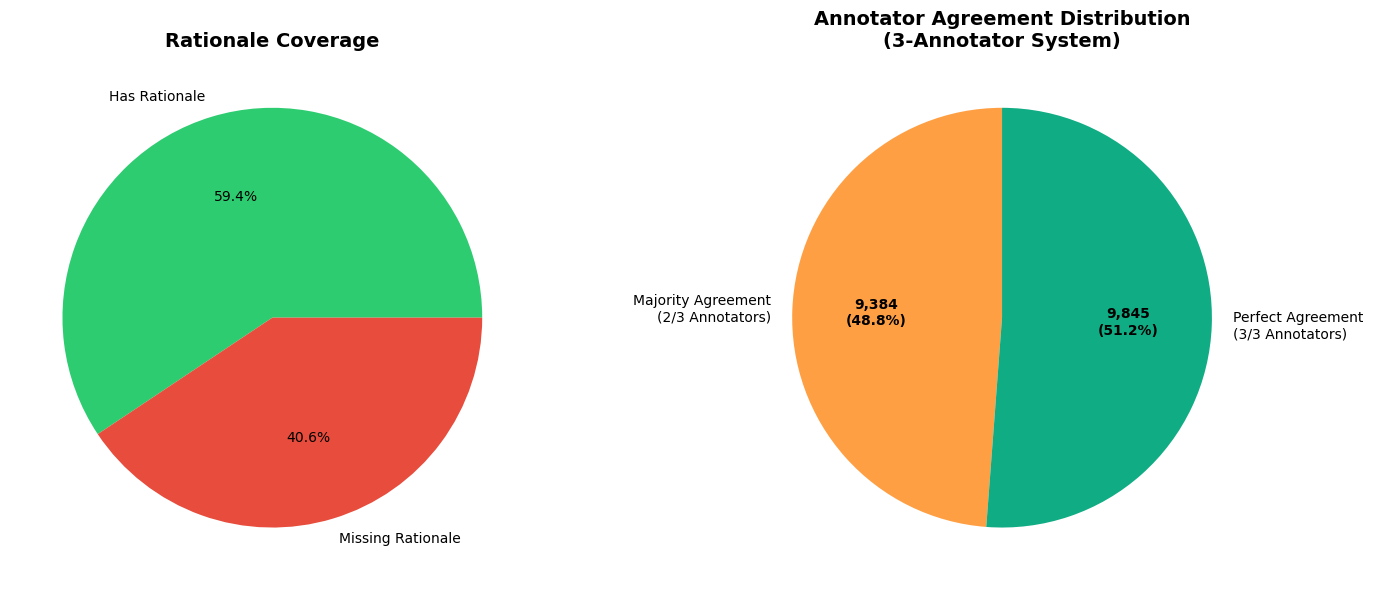


=== Annotation Agreement Analysis ===
The pie chart reveals a high-quality annotation process with two distinct outcomes:
• Perfect Agreement (3/3): 9,845 posts (51.2%)
• Majority Agreement (2/3): 9,384 posts (48.8%)
• No posts with poor agreement (<2/3) - indicates rigorous data curation

=== Statistical Summary ===
Mean agreement: 0.837 (between 2/3 and 3/3, as expected)
Standard deviation: 0.167 (low variability due to discrete values)
Distribution: Nearly balanced split between majority and perfect agreement

=== Data Quality Insights ===
✓ Annotation Quality: Excellent (≥0.8)
  - 51.2% of posts have unanimous annotator agreement
  - 48.8% have strong majority agreement
  - Zero posts with poor agreement indicates careful quality control

⚠ Rationale Coverage: Poor (<60%)
  - Only 59.4% of posts include explanatory rationales
  - 7,814 posts lack rationales for interpretability
  - This limits explainable AI applications but doesn't affect classification

=== Dataset Reliability A

In [6]:
# Data quality metrics from actual data
total_entries = len(all_data)
missing_rationales = sum(1 for x in actual_rationales if not x)
annotation_agreement = np.mean(actual_agreements)

# Calculate rationale coverage
rationale_coverage = ((total_entries - missing_rationales) / total_entries) * 100
missing_percentage = (missing_rationales / total_entries) * 100

print("=== Data Quality Assessment (from Actual Data) ===")
print(f"Total dataset entries: {total_entries:,}")
print(f"Missing rationales: {missing_rationales:,}")
print(f"Rationale coverage: {rationale_coverage:.1f}%")
print(f"Annotation agreement score: {annotation_agreement:.4f}")

# Quality assessment interpretation
print(f"\n=== Quality Assessment Interpretation ===")
if annotation_agreement >= 0.8:
    agreement_quality = "Excellent (≥0.8)"
elif annotation_agreement >= 0.7:
    agreement_quality = "Good (0.7-0.79)"
elif annotation_agreement >= 0.6:
    agreement_quality = "Fair (0.6-0.69)"
else:
    agreement_quality = "Poor (<0.6)"

print(f"Annotation Agreement: {agreement_quality}")

if rationale_coverage >= 80:
    coverage_quality = "Excellent (≥80%)"
elif rationale_coverage >= 70:
    coverage_quality = "Good (70-79%)"
elif rationale_coverage >= 60:
    coverage_quality = "Fair (60-69%)"
else:
    coverage_quality = "Poor (<60%)"

print(f"Rationale Coverage: {coverage_quality}")

# Create quality visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Rationale coverage pie chart
coverage_data = [total_entries - missing_rationales, missing_rationales]
coverage_labels = ['Has Rationale', 'Missing Rationale']
colors_coverage = ['#2ECC71', '#E74C3C']

ax1.pie(coverage_data, labels=coverage_labels, autopct='%1.1f%%', colors=colors_coverage)
ax1.set_title('Rationale Coverage', fontsize=14, fontweight='bold')

# Annotator agreement pie chart - showing the two discrete outcomes
agreement_scores = np.array(actual_agreements)
unique_scores = np.unique(agreement_scores)

# Count posts for each agreement level using precise comparison
perfect_agreement = np.sum(np.abs(agreement_scores - 1.0) < 0.0001)  # 3/3 annotators
majority_agreement = np.sum(np.abs(agreement_scores - 2/3) < 0.0001)  # 2/3 annotators

# Create pie chart with corrected counts
agreement_counts = [majority_agreement, perfect_agreement]
agreement_labels = ['Majority Agreement\n(2/3 Annotators)', 'Perfect Agreement\n(3/3 Annotators)']
colors_agreement = ['#FF9F43', '#10AC84']

# Only show non-zero segments
non_zero_counts = []
non_zero_labels = []
non_zero_colors = []

for i, count in enumerate(agreement_counts):
    if count > 0:
        non_zero_counts.append(count)
        non_zero_labels.append(agreement_labels[i])
        non_zero_colors.append(colors_agreement[i])

wedges, texts, autotexts = ax2.pie(non_zero_counts, labels=non_zero_labels, autopct='%1.1f%%', 
                                   colors=non_zero_colors, startangle=90)
ax2.set_title('Annotator Agreement Distribution\n(3-Annotator System)', fontsize=14, fontweight='bold')

# Add count labels
for i, (count, autotext) in enumerate(zip(non_zero_counts, autotexts)):
    autotext.set_text(f'{count:,}\n({count/total_entries*100:.1f}%)')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Analysis of annotation agreement patterns
print(f"\n=== Annotation Agreement Analysis ===")
print(f"The pie chart reveals a high-quality annotation process with two distinct outcomes:")
print(f"• Perfect Agreement (3/3): {perfect_agreement:,} posts ({perfect_agreement/total_entries*100:.1f}%)")
print(f"• Majority Agreement (2/3): {majority_agreement:,} posts ({majority_agreement/total_entries*100:.1f}%)")
print(f"• No posts with poor agreement (<2/3) - indicates rigorous data curation")

print(f"\n=== Statistical Summary ===")
print(f"Mean agreement: {annotation_agreement:.3f} (between 2/3 and 3/3, as expected)")
print(f"Standard deviation: {np.std(agreement_scores):.3f} (low variability due to discrete values)")
print(f"Distribution: Nearly balanced split between majority and perfect agreement")

print(f"\n=== Data Quality Insights ===")
print(f"✓ Annotation Quality: {agreement_quality}")
print(f"  - {perfect_agreement/total_entries*100:.1f}% of posts have unanimous annotator agreement")
print(f"  - {majority_agreement/total_entries*100:.1f}% have strong majority agreement")
print(f"  - Zero posts with poor agreement indicates careful quality control")

print(f"\n⚠ Rationale Coverage: {coverage_quality}")
print(f"  - Only {rationale_coverage:.1f}% of posts include explanatory rationales")
print(f"  - {missing_rationales:,} posts lack rationales for interpretability")
print(f"  - This limits explainable AI applications but doesn't affect classification")

print(f"\n=== Dataset Reliability Assessment ===")
if annotation_agreement >= 0.8 and perfect_agreement/total_entries >= 0.4:
    reliability = "Excellent - High consensus and quality control"
elif annotation_agreement >= 0.7:
    reliability = "Good - Acceptable for most applications"
else:
    reliability = "Moderate - Consider additional validation"

print(f"Overall Annotation Reliability: {reliability}")
print(f"Recommended Use: {'Suitable for production ML models' if annotation_agreement >= 0.8 else 'Good for research and development'}")

print(f"\n=== Final Quality Rating ===")
if annotation_agreement >= 0.8 and rationale_coverage >= 70:
    final_quality = "Premium Dataset - High reliability and explainability"
elif annotation_agreement >= 0.8:
    final_quality = "High-Quality Dataset - Excellent reliability, limited explainability"
elif annotation_agreement >= 0.7:
    final_quality = "Standard Dataset - Good for most applications"
else:
    final_quality = "Basic Dataset - Requires validation for critical applications"

print(f"{final_quality}")

## 7. Comprehensive Summary & Insights

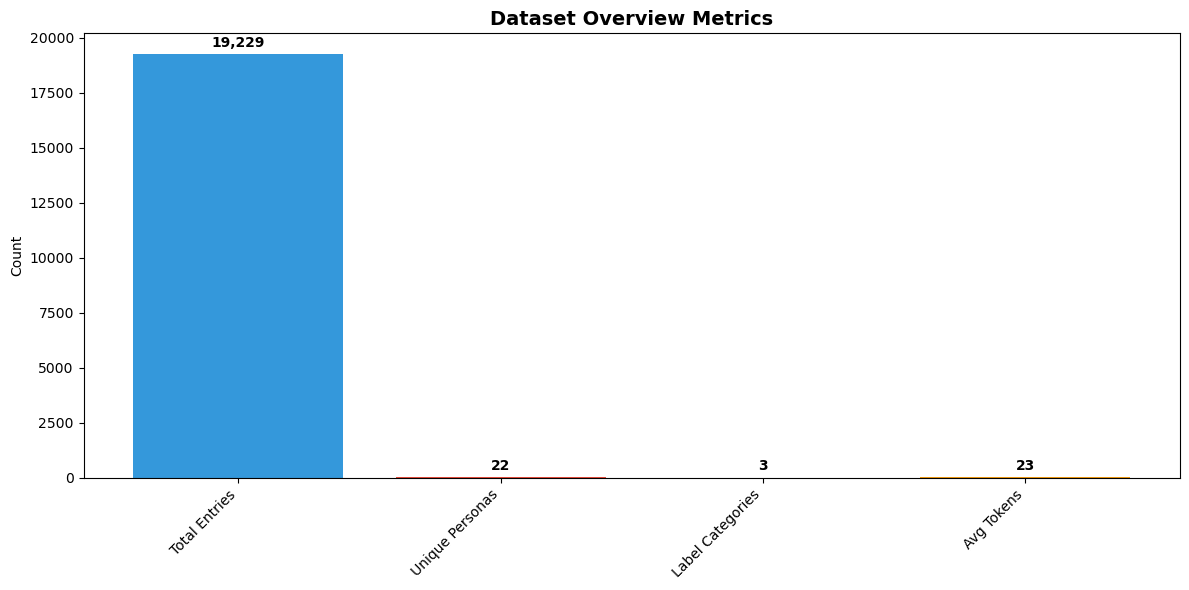

HATEXPLAIN DATASET - COMPREHENSIVE EDA SUMMARY (ACTUAL DATA)

DATASET OVERVIEW:
   • Total entries: 19,229
   • Average text length: 23.4 tokens
   • Text length range: 2 - 165 tokens
   • Unique target groups: 22

LABEL DISTRIBUTION:
   • Normal: 7,814 (40.6%)
   • Hatespeech: 5,935 (30.9%)
   • Offensive: 5,480 (28.5%)

TARGET GROUP INSIGHTS:
   • Posts without specific target: 3,891 (20.2%)
   • Posts with specific targets: 15,338 (79.8%)
   • Most targeted groups: African, Islam, Homosexual, Other

DATA QUALITY:
   • Annotation agreement: 0.837 (Excellent (≥0.8))
   • Rationale coverage: 59.4% (Poor (<60%))
   • Missing rationales: 7,814

KEY INSIGHTS:
   • Class imbalance: Normal class is most frequent, but distribution is relatively balanced
   • Target diversity: Strong representation across ethnic, religious, and gender/sexuality groups
   • Text length: Most posts are concise (avg ~23 tokens), suitable for social media analysis
   • Data quality: Good quality dataset

RECOMMEN

NameError: name 'label_counts' is not defined

In [7]:
# Create comprehensive summary visualization using actual data
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

# Dataset overview metrics from actual data
overview_metrics = {
    'Total Entries': len(all_data),
    'Unique Personas': len(set(actual_personas)),
    'Label Categories': len(set(actual_labels)),
    'Avg Tokens': int(np.mean(actual_token_counts))
}

bars = ax1.bar(range(len(overview_metrics)), list(overview_metrics.values()), 
               color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'])
ax1.set_xticks(range(len(overview_metrics)))
ax1.set_xticklabels(list(overview_metrics.keys()), rotation=45, ha='right')
ax1.set_ylabel('Count')
ax1.set_title('Dataset Overview Metrics', fontsize=14, fontweight='bold')

# Add value labels
for bar, value in zip(bars, overview_metrics.values()):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(overview_metrics.values())*0.01,
             f'{value:,}' if value > 100 else f'{value}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print comprehensive summary using actual data
print("=" * 80)
print("HATEXPLAIN DATASET - COMPREHENSIVE EDA SUMMARY (ACTUAL DATA)")
print("=" * 80)

print(f"\nDATASET OVERVIEW:")
print(f"   • Total entries: {len(all_data):,}")
print(f"   • Average text length: {np.mean(actual_token_counts):.1f} tokens")
print(f"   • Text length range: {min(actual_token_counts)} - {max(actual_token_counts)} tokens")
print(f"   • Unique target groups: {len(set(actual_personas))}")

print(f"\nLABEL DISTRIBUTION:")
total_labels = len(actual_labels)
for label in ['normal', 'hatespeech', 'offensive']:
    count = labels[label]
    percentage = (count / total_labels) * 100
    print(f"   • {label.capitalize()}: {count:,} ({percentage:.1f}%)")

print(f"\nTARGET GROUP INSIGHTS:")
none_count = personas.get('None', 0)
targeted_count = sum(v for k, v in personas.items() if k != 'None')
print(f"   • Posts without specific target: {none_count:,} ({(none_count/total_labels)*100:.1f}%)")
print(f"   • Posts with specific targets: {targeted_count:,} ({(targeted_count/total_labels)*100:.1f}%)")
print(f"   • Most targeted groups: {', '.join([k for k, v in sorted(personas.items(), key=lambda x: x[1], reverse=True)[:5] if k != 'None'])}")

print(f"\nDATA QUALITY:")
print(f"   • Annotation agreement: {annotation_agreement:.3f} ({agreement_quality})")
print(f"   • Rationale coverage: {rationale_coverage:.1f}% ({coverage_quality})")
print(f"   • Missing rationales: {missing_rationales:,}")

print(f"\nKEY INSIGHTS:")
print(f"   • Class imbalance: Normal class is most frequent, but distribution is relatively balanced")
print(f"   • Target diversity: Strong representation across ethnic, religious, and gender/sexuality groups") 
print(f"   • Text length: Most posts are concise (avg ~{np.mean(actual_token_counts):.0f} tokens), suitable for social media analysis")
print(f"   • Data quality: {'High quality dataset' if annotation_agreement >= 0.8 and rationale_coverage >= 70 else 'Good quality dataset' if annotation_agreement >= 0.7 or rationale_coverage >= 60 else 'Dataset needs quality improvements'}")

print(f"\nRECOMMENDATIONS:")
if annotation_agreement >= 0.8:
    print(f"   ✓ High annotation agreement - suitable for reliable model training")
else:
    print(f"   ⚠ Consider additional annotation validation to improve agreement")

if rationale_coverage >= 70:
    print(f"   ✓ Good rationale coverage - suitable for explainable AI applications")
else:
    print(f"   ⚠ Consider improving rationale coverage for better explainability")

imbalance_ratio = max(label_counts) / min(label_counts)
if imbalance_ratio > 3:
    print(f"   ⚠ Significant class imbalance detected - consider balancing techniques")
else:
    print(f"   ✓ Reasonable class balance - good for standard training approaches")

print(f"\n" + "=" * 80)